# import libraries and iris.csv dataset
3 classes (iris flower species) given 4 related features (sepal and petal length & width)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df= pd.read_csv('../input/ds-francis/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df1 = df.drop('Id', axis=1)

In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Checking for any missing data in features

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

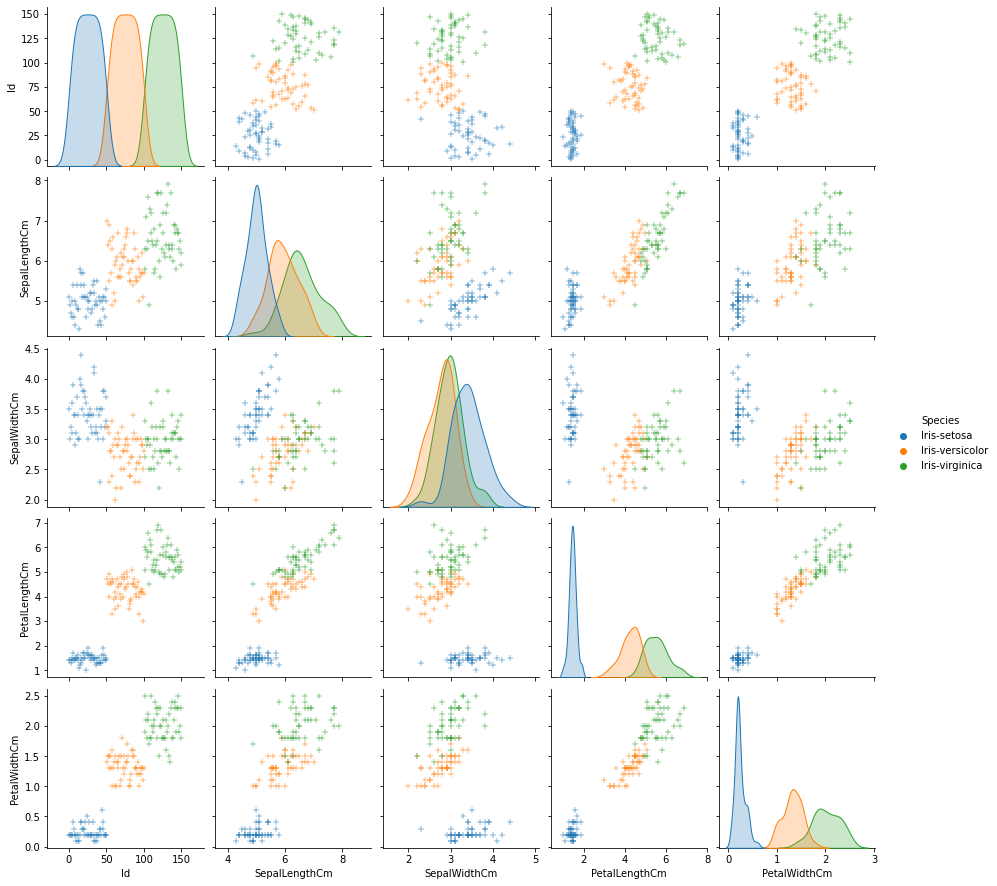

In [5]:
import seaborn as sns
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

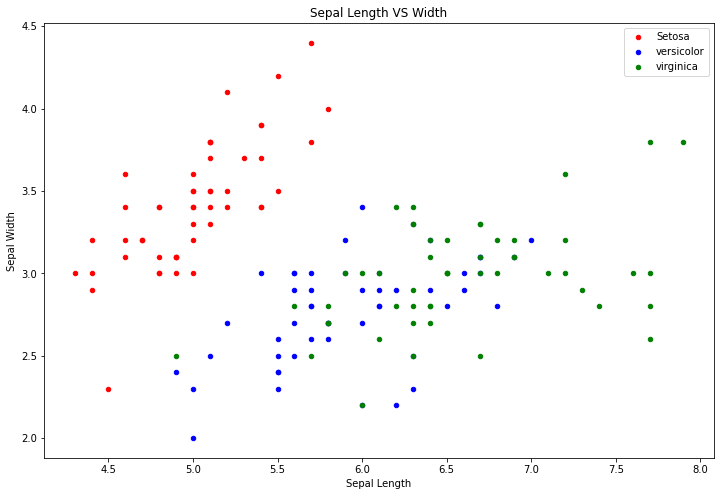

In [6]:
fig = df1[df1.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

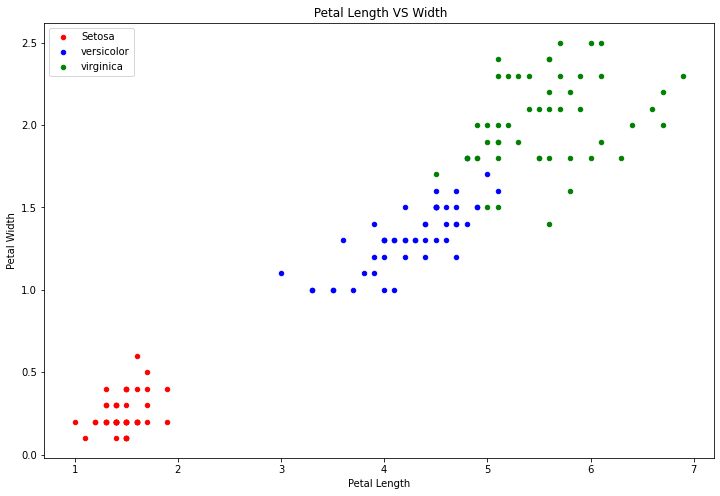

In [7]:
fig = df1[df1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [8]:
df.drop(['Id'] ,inplace =True , axis =1)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# train_test_split using 20% data for testing

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [11]:
X_train = train.drop(columns=['Species'],axis=1)
y_train = train['Species']
X_train = X_train /10
X_test = test.drop(columns=['Species'],axis=1)
y_test = test['Species']
X_test /=10

print(X_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
53            0.55          0.23           0.40          0.13
47            0.46          0.32           0.14          0.02
116           0.65          0.30           0.55          0.18
115           0.64          0.32           0.53          0.23
94            0.56          0.27           0.42          0.13


# SGDClassifier run for Logistic Reg and predict species

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()

In [13]:
LR_model.fit(X_train,y_train)

LogisticRegression()

In [14]:
LR_predict = LR_model.predict(X_test)
print(LR_predict)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


# Log Reg: Accuracy, Precesion, Recall, F1, Cross val (cv=5)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(LR_predict, y_test))
print(precision_score(LR_predict, y_test,average='macro'))
print(recall_score(LR_predict, y_test,average='macro'))
print(f1_score(LR_predict, y_test,average='macro'))

0.8333333333333334
0.8148148148148149
0.8808080808080808
0.8046398046398044


In [16]:
from sklearn.model_selection import cross_val_score

print( cross_val_score(LR_model,X_train,y_train,cv=5,scoring='accuracy'))

[0.95833333 0.875      0.83333333 0.875      0.91666667]


# SGDClassifier run for Support Vector Machines (SVM); and  predict species

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

smv_model = SVC()

In [18]:
smv_model.fit(X_test, y_test)

SVC()

In [19]:
smv_predict = smv_model.fit(X_test, y_test)
print(smv_predict)
print(y_test)

SVC()
102     Iris-virginica
121     Iris-virginica
83     Iris-versicolor
96     Iris-versicolor
24         Iris-setosa
86     Iris-versicolor
6          Iris-setosa
52     Iris-versicolor
139     Iris-virginica
138     Iris-virginica
2          Iris-setosa
29         Iris-setosa
59     Iris-versicolor
62     Iris-versicolor
100     Iris-virginica
21         Iris-setosa
113     Iris-virginica
118     Iris-virginica
123     Iris-virginica
11         Iris-setosa
98     Iris-versicolor
42         Iris-setosa
76     Iris-versicolor
3          Iris-setosa
143     Iris-virginica
111     Iris-virginica
66     Iris-versicolor
137     Iris-virginica
27         Iris-setosa
0          Iris-setosa
Name: Species, dtype: object


# SVM: Accuracy, Precesion, Recall, F1, Cross val (cv=5)

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
smv_model = SVC()

smv_model.fit(X_test, y_test)

SVC()

In [21]:
accuracy_score = smv_model.score(X_test,y_test)
print(accuracy_score)

0.9333333333333333


In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report

predict = smv_model.predict(X_test)
print(predict)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [23]:
from sklearn.metrics import classification_report

ClassR= metrics.classification_report(y_test, predict)
print(ClassR)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



# Confusion Matrix for both LR and SVM

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(y_test)

print('LR: \n', confusion_matrix(LR_predict,y_test))
print('SMV: \n', confusion_matrix(LR_predict,y_test))

102     Iris-virginica
121     Iris-virginica
83     Iris-versicolor
96     Iris-versicolor
24         Iris-setosa
86     Iris-versicolor
6          Iris-setosa
52     Iris-versicolor
139     Iris-virginica
138     Iris-virginica
2          Iris-setosa
29         Iris-setosa
59     Iris-versicolor
62     Iris-versicolor
100     Iris-virginica
21         Iris-setosa
113     Iris-virginica
118     Iris-virginica
123     Iris-virginica
11         Iris-setosa
98     Iris-versicolor
42         Iris-setosa
76     Iris-versicolor
3          Iris-setosa
143     Iris-virginica
111     Iris-virginica
66     Iris-versicolor
137     Iris-virginica
27         Iris-setosa
0          Iris-setosa
Name: Species, dtype: object
LR: 
 [[10  1  0]
 [ 0  4  0]
 [ 0  4 11]]
SMV: 
 [[10  1  0]
 [ 0  4  0]
 [ 0  4 11]]


In [26]:
df.to_csv('submission.csv', index=None)
!ls


submission.csv
